In [1]:
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.evolve import Evolve
from cosmic.utils import convert_kstar_evol_type
from cosmic.plotting import evolve_and_plot

import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [2]:
# Helper functions and variables for unit conversions

def aui_to_porb(aui, m_tot):
    # aui: a list of values, initial separation in AU
    # m_tot: a list of values, total mass in M_sun
    # result: a list of values, orbital period in given condition in days
    res = []
    for i in range(len(aui)):
        res.append((1/m_tot[i]**0.5) * (aui[i]**1.5) * 365)
    return res

# Used to convert separation in R_sun into AU
unit_factor = 1 / 215.032

# Helper function: given an array of data and an array of target,
# return an array of index that is nearest to the target value.
import math 
def findNearestList(data, targetList):
    res = []
    for num in targetList:
        res.append(findNearest(data, num))
    return res

def findNearest(data, target):
    n = len(data)
    res = -1
    minDiff = 10**5
    for i in range(n):
        if data[i] == 10**(-5):
            continue
        if abs(target - data[i]) <= minDiff:
            res = i
            minDiff = abs(target - data[i])
    return res

In [3]:
# Default BSEDict with modified qcrit_array
# force stable mass transfer
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 
           'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 
           'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 
           'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 
           'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 
           'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 
           'qcrit_array' : [20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0], 
           'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 
           'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 
           'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 
           'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 0, 'ST_cr' : 1, 
           'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 
           'don_lim' : -1, 'acc_lim' : 0.1, 'rtmsflag' : 0, 'wd_mass_lim': 1}

In [4]:
NUM_SEP = 400

MASS_1 = 7
MASS_2 = 1
MASS_TOT = MASS_1 + MASS_2

ECC = 0

SEP_START = 2
SEP_END = 8

SOLAR_MET = 0.02

TPHYS_LIM = 20000

In [5]:
BSEDict['acc_lim'] = 0

In [6]:
i = 2
while i < 4.5:
    binary_set = InitialBinaryTable.InitialBinaries(m1=MASS_1, m2=MASS_2, 
                                                porb=aui_to_porb([i],[MASS_TOT])[0], ecc=0, 
                                                tphysf=20000, kstar1=1, kstar2=1, 
                                                metallicity=0.02)
    bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=binary_set, BSEDict=BSEDict, dtp=0)
    bpp['sep in AU'] = bpp['sep'] * unit_factor
    print(f'i = {i}')
    print(bpp[['tphys', 'mass_1', 'mass_2', 'kstar_1', 'kstar_2', 'sep in AU', 'evol_type']])
    i = i + 0.05

i = 2
          tphys    mass_1    mass_2  kstar_1  kstar_2     sep in AU  evol_type
0      0.000000  7.000000  1.000000      1.0      1.0  1.998361e+00        1.0
0     48.459967  6.944129  1.000000      2.0      1.0  2.012416e+00        2.0
0     48.617920  6.943478  1.000001      3.0      1.0  2.010125e+00        2.0
0     48.659382  6.942771  1.000007      3.0      1.0  1.486459e+00        3.0
0     48.678764  6.924090  1.000019      4.0      1.0  1.455819e+00        2.0
0     48.716206  3.073985  1.000049      4.0      1.0  1.415916e-02        5.0
0     48.716206  3.073985  1.000049      4.0      1.0  1.415916e-02        7.0
0     48.716206  1.344867  1.000049      7.0      1.0  1.341252e-02        8.0
0     48.716206  1.344867  1.000049      7.0      1.0  1.341252e-02        4.0
0     59.601699  1.300886  1.001434      8.0      1.0  1.325446e-02        2.0
0     60.488820  1.284224  1.002512      8.0      1.0  1.331099e-02        3.0
0     60.647458  0.834472  1.005316      8.0  

In [27]:
i = 5
binary_set = InitialBinaryTable.InitialBinaries(m1=MASS_1, m2=MASS_2, 
                                                porb=aui_to_porb([i],[MASS_TOT])[0], ecc=0, 
                                                tphysf=20000, kstar1=1, kstar2=1, 
                                                metallicity=0.02)
bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=binary_set, BSEDict=BSEDict, dtp=0)
bpp['sep in AU'] = bpp['sep'] * unit_factor
bcm['sep in AU'] = bcm['sep'] * unit_factor
print(f'i = {i}')
print(bpp[['tphys','mass_1', 'mass_2', 'kstar_1', 'kstar_2', 'sep in AU', 'evol_type']])

# plt.plot(bcm['tphys'],bcm['sep in AU'])
# plt.xlim(54.5,55.50)

i = 5
          tphys    mass_1    mass_2  kstar_1  kstar_2     sep in AU  evol_type
0      0.000000  7.000000  1.000000      1.0      1.0  4.995904e+00        1.0
0     48.459967  6.944129  1.000000      2.0      1.0  5.031040e+00        2.0
0     48.617920  6.943478  1.000000      3.0      1.0  5.031468e+00        2.0
0     48.678764  6.941467  1.000007      4.0      1.0  5.018299e+00        2.0
0     54.850810  6.735544  1.000569      5.0      1.0  5.099778e+00        2.0
0     55.083797  6.697128  1.000870      5.0      1.0  3.860463e+00        3.0
0     55.150278  6.599484  1.001293      6.0      1.0  3.558691e+00        2.0
0     55.176817  1.239417  1.001565      6.0      1.0  1.608474e-02        4.0
0     55.358820  1.238056  1.001777     12.0      1.0  1.606912e-02        2.0
0   1327.950277  1.238056  1.001777     12.0      1.0  1.169005e-02        3.0
0   1923.450468  1.238056  0.742584     12.0      0.0  9.115471e-03        2.0
0   6460.980514  1.238056  0.095052     12.0  

In [8]:
# initC['windflag'] = 0
# initC['htpmb'] = -1
# bpp_nw, bcm_nw, initC, kick_info = Evolve.evolve(initialbinarytable=initC, BSEDict={}, dtp=0)
# bpp_nw['sep in AU'] = bpp_nw['sep'] * unit_factor

In [9]:
# print(initC['acc_lim'])
# print(bpp_nw[['tphys', 'mass_1', 'mass_2', 'kstar_1', 'kstar_2', 'sep in AU', 'evol_type']])

In [10]:
# plt.plot(bcm_nw['tphys'],bcm_nw['deltam_2'])
# plt.plot(bcm['tphys'], bcm['deltam_2'])
# plt.xlim(54,56)

In [11]:
# plt.plot(bcm_nw['tphys'],bcm_nw['deltam_1'])
# plt.plot(bcm['tphys'], bcm['deltam_1'])
# plt.xlim(54,56)

/Users/runqiuye/anaconda3/envs/cosmic/lib/python3.10/site-packages/cosmic/evolve.py:258: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "


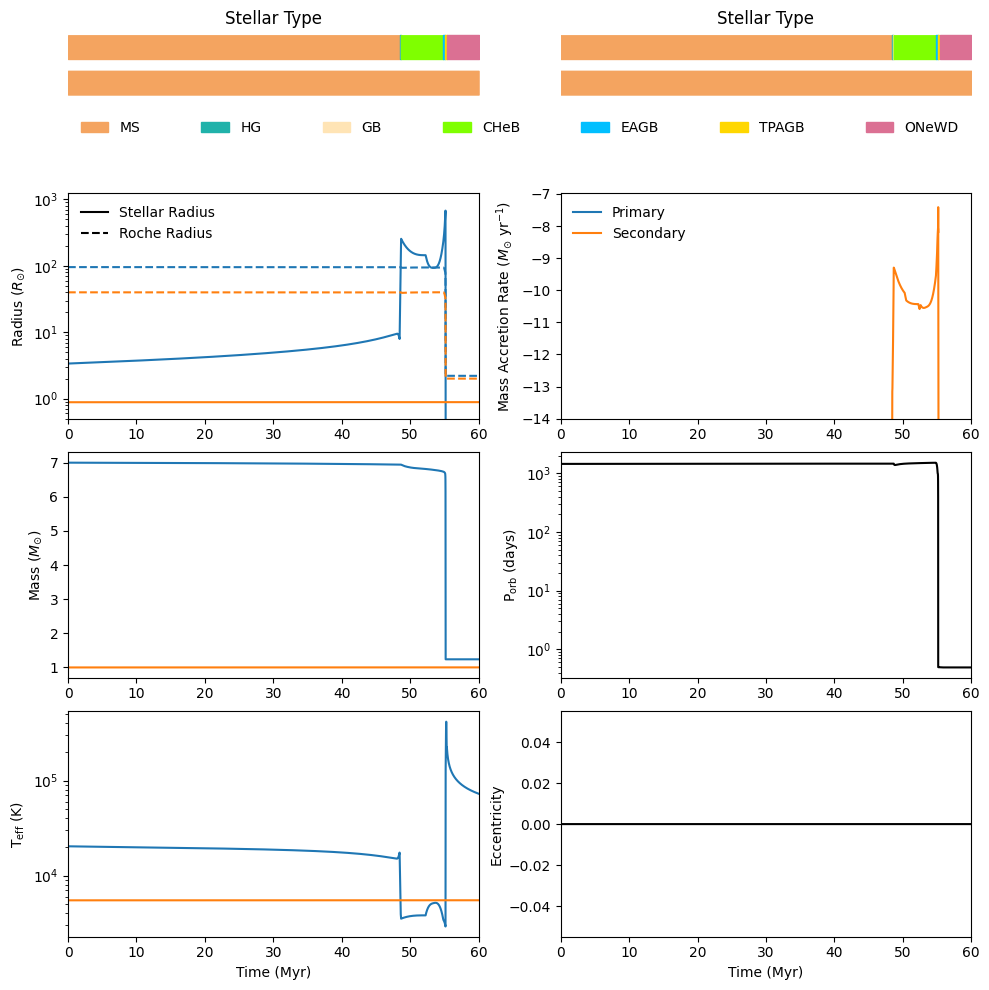

In [26]:
fig = evolve_and_plot(initC.copy(), t_min=None, t_max=60, BSEDict={}, sys_obs={})

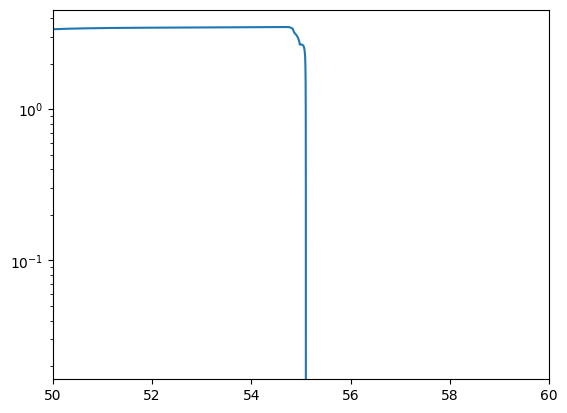

In [13]:
plt.plot(bcm['tphys'], bcm['sep in AU'])
plt.xlim(50,60)
plt.yscale('log')

(55.0, 55.2)

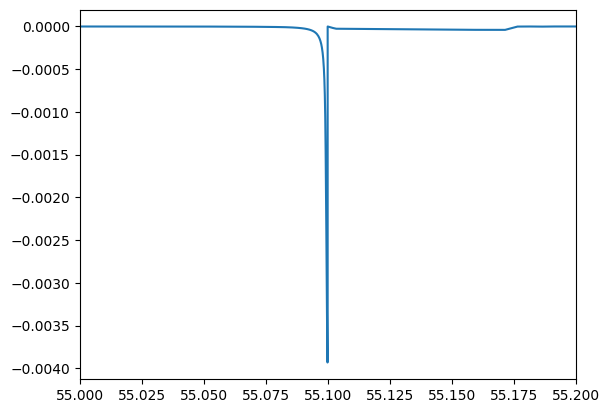

In [14]:
plt.plot(bcm['tphys'], bcm['deltam_1'])
plt.xlim(55,55.2)
# plt.yscale('log')

In [15]:
i = 2.90
binary_set = InitialBinaryTable.InitialBinaries(m1=MASS_1, m2=MASS_2, 
                                                porb=aui_to_porb([i],[MASS_TOT])[0], ecc=0, 
                                                tphysf=20000, kstar1=1, kstar2=1, 
                                                metallicity=0.02)
bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=binary_set, BSEDict=BSEDict, dtp=0)
bpp['sep in AU'] = bpp['sep'] * unit_factor
bcm['sep in AU'] = bcm['sep'] * unit_factor
print(f'i = {i}')
print(bpp[['tphys', 'mass_1', 'mass_2', 'kstar_1', 'kstar_2', 'sep in AU', 'evol_type']])

# plt.plot(bcm['tphys'],bcm['sep in AU'])
# plt.xlim(54.5,55.50)

i = 2.9
          tphys    mass_1    mass_2  kstar_1  kstar_2  sep in AU  evol_type
0      0.000000  7.000000  1.000000      1.0      1.0   2.897624        1.0
0     48.459967  6.944129  1.000000      2.0      1.0   2.918003        2.0
0     48.617920  6.943478  1.000001      3.0      1.0   2.918316        2.0
0     48.678764  6.941467  1.000014      4.0      1.0   2.179365        2.0
0     48.678942  6.941448  1.000015      4.0      1.0   2.161114        3.0
0     48.680316  6.941297  1.000016      4.0      1.0   2.162553        4.0
0     54.850804  6.736319  1.001228      5.0      1.0   2.540353        2.0
0     54.911822  6.731331  1.001280      5.0      1.0   2.252056        3.0
0     55.052047  2.322664  1.001502      5.0      1.0   0.013314        5.0
0     55.052047  2.322664  1.001502      5.0      1.0   0.013314        7.0
0     55.052047  1.775220  1.001502      8.0      1.0   0.013181        8.0
0     55.052047  1.775220  1.001502      8.0      1.0   0.013181        4.0
0   

In [16]:
initC['windflag'] = 0
initC['htpmb'] = -1
bpp_nw, bcm_nw, initC, kick_info = Evolve.evolve(initialbinarytable=initC, BSEDict={}, dtp=0)
bpp_nw['sep in AU'] = bpp_nw['sep'] * unit_factor

In [17]:
print(initC['acc_lim'])
print(bpp_nw[['tphys', 'mass_1', 'mass_2', 'kstar_1', 'kstar_2', 'sep in AU', 'evol_type']])

0    0
Name: acc_lim, dtype: int64
          tphys    mass_1    mass_2  kstar_1  kstar_2  sep in AU  evol_type
0      0.000000  7.000000  1.000000      1.0      1.0   2.897624        1.0
0     48.157352  6.998035  1.000000      2.0      1.0   2.898336        2.0
0     48.311856  6.997346  1.000001      3.0      1.0   2.898683        2.0
0     48.369898  6.995379  1.000014      3.0      1.0   2.152590        3.0
0     48.370513  6.995311  1.000015      4.0      1.0   2.154433        2.0
0     48.417918  6.990045  1.000074      4.0      1.0   2.154215        4.0
0     54.422504  6.782963  1.001278      5.0      1.0   2.491182        2.0
0     54.473695  6.778671  1.001323      5.0      1.0   2.241513        3.0
0     54.614283  2.410682  1.001541      5.0      1.0   0.013364        5.0
0     54.614283  2.410682  1.001541      5.0      1.0   0.013364        7.0
0     54.614283  1.793380  1.001541      8.0      1.0   0.013216        8.0
0     54.614283  1.793380  1.001541      8.0      1.0

(54.0, 56.0)

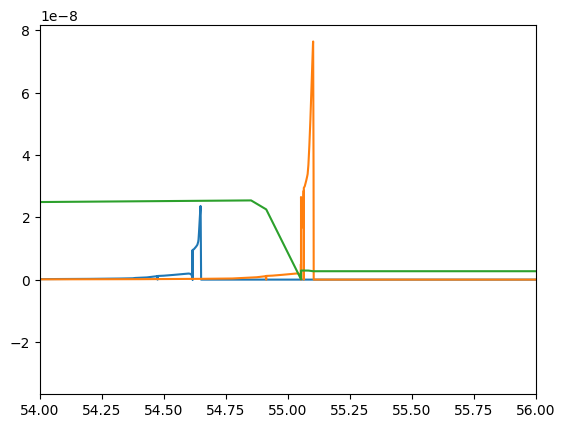

In [18]:
plt.plot(bcm_nw['tphys'],bcm_nw['deltam_2'])
plt.plot(bcm['tphys'], bcm['deltam_2'])
plt.plot(bpp['tphys'], bpp['sep in AU'] / 100000000)
plt.xlim(54,56)

/Users/runqiuye/anaconda3/envs/cosmic/lib/python3.10/site-packages/cosmic/evolve.py:258: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "


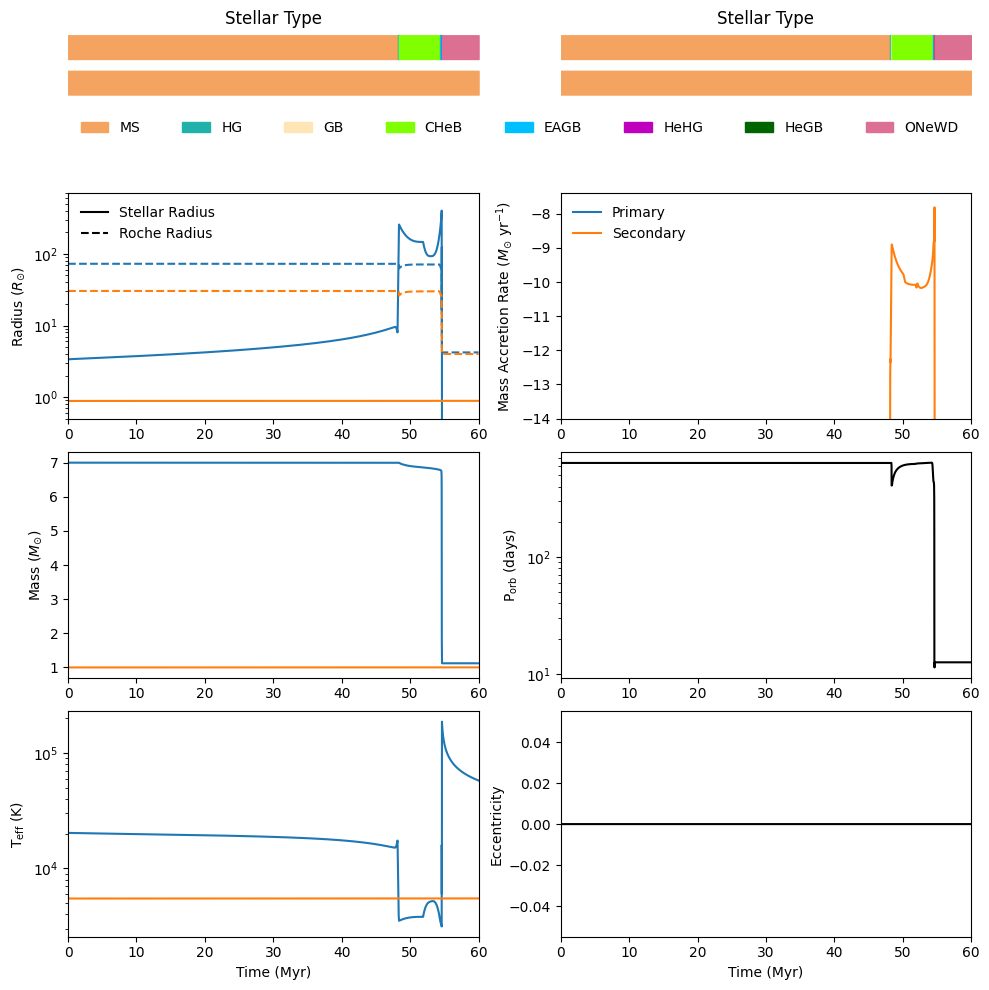

In [19]:
fig = evolve_and_plot(initC.copy(), t_min=0, t_max=60, BSEDict={}, sys_obs={})

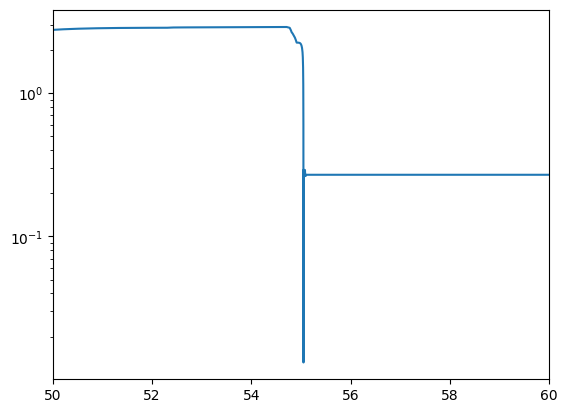

In [20]:
plt.plot(bcm['tphys'], bcm['sep in AU'])
plt.xlim(50,60)
plt.yscale('log')

(50.0, 60.0)

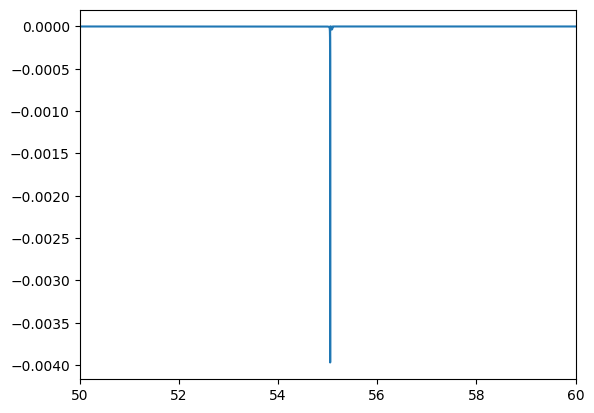

In [21]:
plt.plot(bcm['tphys'], bcm['deltam_1'])
plt.xlim(50,60)
# plt.yscale('log')